# Explore the generated data
Here we explore the data that is generated with the [generate-data.ipynb](generate-data.ipynb) notebook.
You can either run the simulations or download the data set. See [README.md](README.md) for the download link and instructions.

### Joining the seperate data files of one simulation together, example:
```python
# for example if the generated files have the following names:
# 'tmp/1d_alpha_vs_B_x_000.hdf',
# 'tmp/1d_alpha_vs_B_x_001.hdf', 
# 'tmp/1d_alpha_vs_B_x_002.hdf', ...
# The following line with join the files and save it as 'data/new_name.hdf'.
df = common.combine_dfs('tmp/1d_alpha_vs_B_x_*.hdf', 'data/new_name.hdf')
```

In [1]:
import holoviews as hv
import numpy as np
import pandas as pd
import common
hv.notebook_extension()

def add_energy_gs(df):
    hbar = df.hbar.unique()[0]
    eV = df.eV.unique()[0]
    flux_quantum_over_2pi =  hbar / (2 * eV) / (eV * 1e6)
    df['E'] = df['currents'].apply(np.cumsum)
    df['E'] *= flux_quantum_over_2pi
    df['phase_gs_arg'] = df['E'].apply(np.argmin)
    df['phase_gs'] = [row['phases'][row['phase_gs_arg']] for i, row in df.iterrows()]

    # Move the phase_gs from -π to +π if they are within the tolerance
    tol = np.diff(df['phases'].iloc[0]).max()
    df['phase_gs'] = [-row['phase_gs'] if row['phase_gs'] < -(np.pi - tol) else row['phase_gs'] 
                      for i, row in df.iterrows()]
    return df

# Data like Figure 4 but with all combinations

:DynamicMap   [orbital,g,alpha,mu,disorder,salt,B_x]
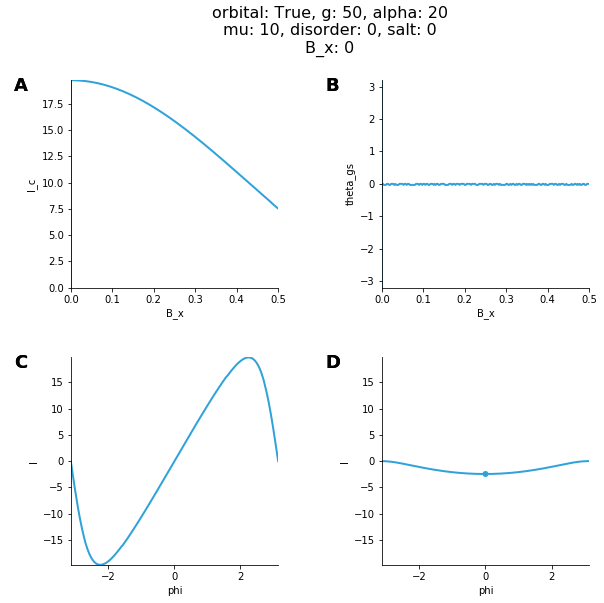

In [36]:
df = pd.read_hdf('data/I_c(B_x)_mu10,20meV_disorder0,75meV_T0.1K_all_combinations_of_effects.hdf')
df = add_energy_gs(df)
params = ['orbital', 'g', 'alpha', 'mu', 'disorder', 'salt']
gb = df.groupby(params)
hv.DynamicMap(plot, kdims=kdims)

First mode, no disorder, T=50mK, with orbital and SOI

:DynamicMap   [orbital,g,alpha,mu,disorder,salt,B_x]
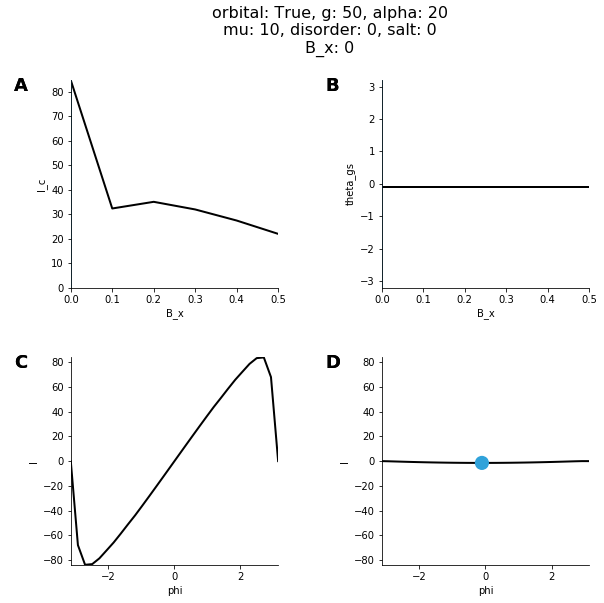

In [53]:
df = pd.read_hdf('data/I_c(B_x)_mu10_disorder0_T0.05K_orbital.hdf')
df = add_energy_gs(df)
params = ['orbital', 'g', 'alpha', 'mu', 'disorder', 'salt']
gb = df.groupby(params)
hv.DynamicMap(plot, kdims=kdims)

First mode, no disorder, T=50mK, without orbital and SOI, Zeeman only

:DynamicMap   [orbital,g,alpha,mu,disorder,salt,B_x]
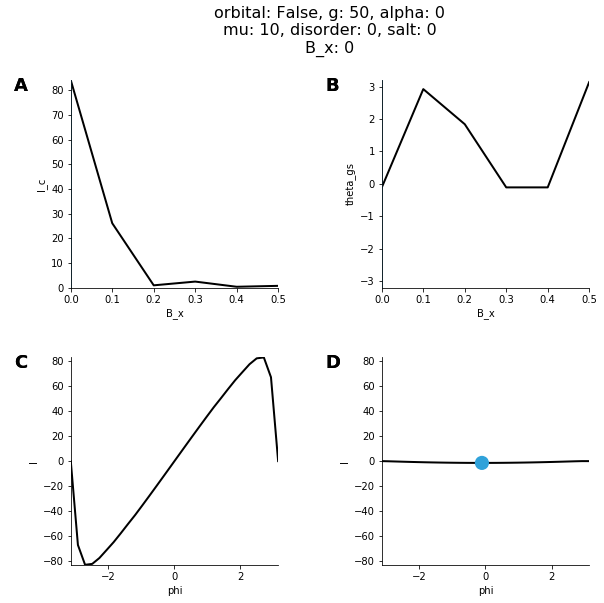

In [48]:
df = pd.read_hdf('data/I_c(B_x)_mu10_disorder0_T0.05K.hdf')
df = add_energy_gs(df)
params = ['orbital', 'g', 'alpha', 'mu', 'disorder', 'salt']
gb = df.groupby(params)
hv.DynamicMap(plot, kdims=kdims)

In [55]:
%%opts Curve (color='k') Scatter (s=200)

def plot(orbital, g, alpha, mu, disorder, salt, B_x):
    gr = gb.get_group((orbital, g, alpha, mu, disorder, salt))
    gr = gr.set_index('B_x', drop=False)
    x = gr.loc[B_x]
    current = hv.Curve((gr.B_x, gr.current_c), kdims=['B_x'], vdims=['I_c'])[0:, 0:]
    phase_gs = hv.Curve((gr.B_x, gr.phase_gs), kdims=['B_x'], vdims=['theta_gs'])[:, -3.2:3.2]
    cpr = hv.Curve((x.phases, x.currents), kdims=['phi'], vdims=['I'])
    energy = hv.Curve((x.phases, x.E), kdims=['phi'], vdims=['I'])
    E_min = hv.Scatter((x.phase_gs, x.E[x.phase_gs_arg]), kdims=['phi'], vdims=['E'])
    VLine = hv.VLine(B_x)
    return (current * VLine + phase_gs * VLine + cpr + energy * E_min).cols(2)

kdims = [hv.Dimension('orbital', values=df.orbital.unique()), 
         hv.Dimension('g', values=df.g.unique()), 
         hv.Dimension('alpha', values=df.alpha.unique()), 
         hv.Dimension('mu', values=df.mu.unique()), 
         hv.Dimension('disorder', values=df.disorder.unique()), 
         hv.Dimension('salt', values=df.salt.unique()), 
         hv.Dimension('B_x', values=df.B_x.unique())]

First mode, no disorder, T=50mK, with orbital but no spin-orbital

:DynamicMap   [orbital,g,alpha,mu,disorder,salt,B_x]
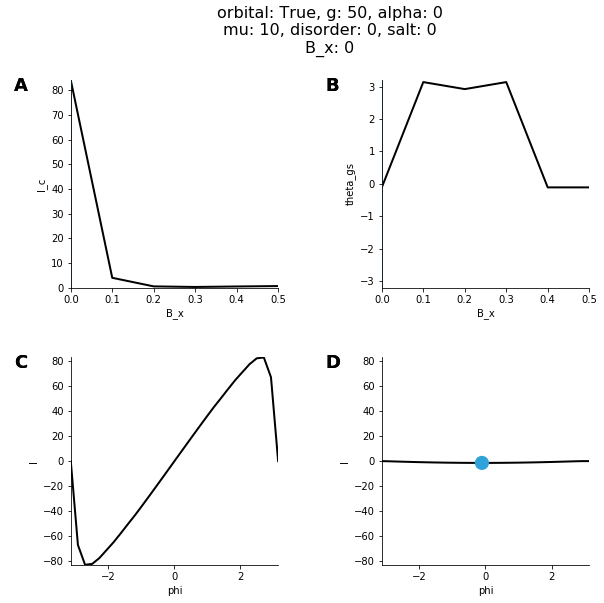

In [56]:
df = pd.read_hdf('data/I_c(B_x)_mu10_disorder0_T0.05K_onlyorbital.hdf')
df = add_energy_gs(df)
params = ['orbital', 'g', 'alpha', 'mu', 'disorder', 'salt']
gb = df.groupby(params)
hv.DynamicMap(plot, kdims=kdims)

# Different $T$, with or without leads, different lenghts of the system

In [ ]:
df2 = pd.read_hdf('data/I_c(B_x)_no_disorder_combinations_of_effects_and_geometries.hdf')
df2 = add_energy_gs(df2)
params = ['T', 'L', 'orbital', 'g', 'alpha', 'mu', 'with_leads']
gb = df2.groupby(params)

In [ ]:
%%opts Curve (color='k') Scatter (s=200)

def plot(T, L, orbital, g, alpha, mu, with_leads, B_x):
    gr = gb.get_group((T, L, orbital, g, alpha, mu, with_leads))
    gr = gr.set_index('B_x', drop=False)
    x = gr.loc[B_x]
    current = hv.Curve((gr.B_x, gr.current_c), kdims=['B_x'], vdims=['I_c'])[:, 0:]
    phase_gs = hv.Curve((gr.B_x, gr.phase_gs), kdims=['B_x'], vdims=['theta_gs'])[:, -3.2:3.2]
    cpr = hv.Curve((x.phases, x.currents), kdims=['phi'], vdims=['I'])
    energy = hv.Curve((x.phases, x.E), kdims=['phi'], vdims=['E'])
    E_min = hv.Scatter((x.phase_gs, x.E[x.phase_gs_arg]), kdims=['phi'], vdims=['E'])
    VLine = hv.VLine(B_x)
    return (current * VLine + phase_gs * VLine + cpr + energy * E_min).cols(2)

kdims = [hv.Dimension('T', values=df2['T'].unique()), 
         hv.Dimension('L', values=df2.L.unique()), 
         hv.Dimension('orbital', values=df2.orbital.unique()), 
         hv.Dimension('g', values=df2.g.unique()), 
         hv.Dimension('alpha', values=df2.alpha.unique()), 
         hv.Dimension('mu', values=df2.mu.unique()), 
         hv.Dimension('with_leads', values=df2.with_leads.unique()),
         hv.Dimension('B_x', values=df2.B_x.unique())]

dm = hv.DynamicMap(plot, kdims=kdims)
dm

In [ ]:
ds = hv.Dataset(df2)
ds.to.curve(['B_x'], ['current_c'], groupby=params, dynamic=True).overlay('L').select(B=(0, 0.5))

In [ ]:
params = ['T', 'B_x', 'orbital', 'g', 'alpha', 'mu', 'with_leads']
curve = ds.to.curve(['L'], ['current_c'], groupby=params, dynamic=True)
curve.redim(current_c=dict(range=(0, None)))

# Rotation of field

:Layout
   .HoloMap.I  :HoloMap   [theta,disorder]
      :Curve   [B]   (current_c)
   .HoloMap.II :HoloMap   [theta,disorder]
      :Curve   [B]   (phase_gs)
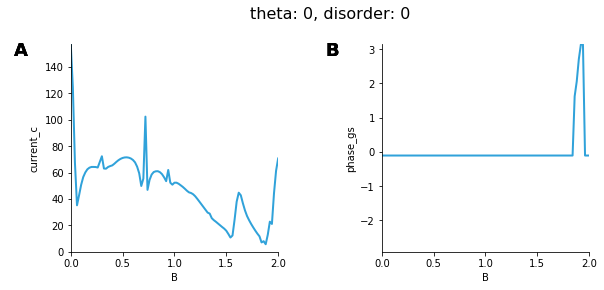
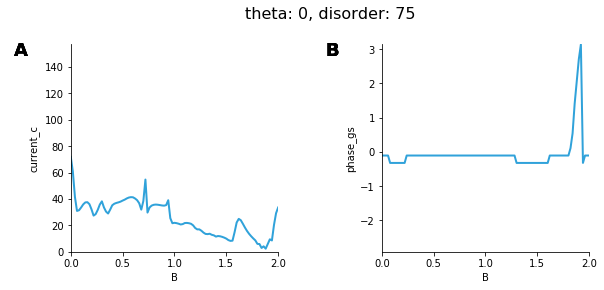
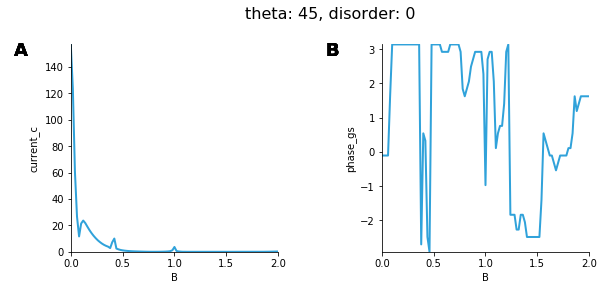
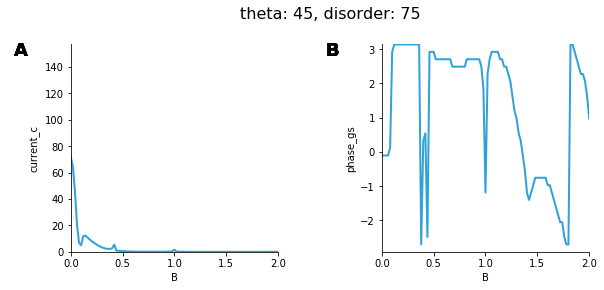
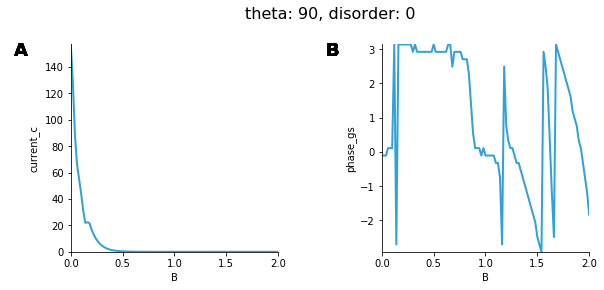
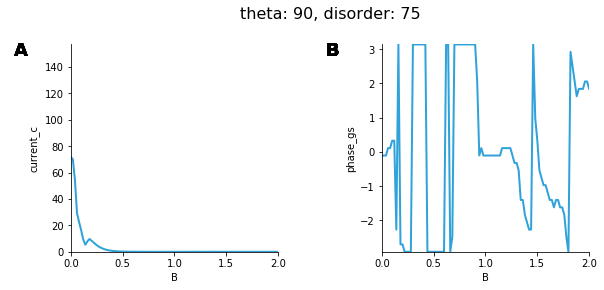

In [2]:
%%opts Path [aspect='square']
df = pd.read_hdf('data/I_c(B_x)_mu20meV_rotation_of_field_in_xy_plane.hdf')
df = add_energy_gs(df)
df2 = common.drop_constant_columns(df)
ds = hv.Dataset(df2)
current = ds.to.curve(kdims='B', vdims='current_c', groupby=['theta', 'disorder']).redim(current_c=dict(range=(0, None)))
phase = ds.to.curve(kdims='B', vdims='phase_gs', groupby=['theta', 'disorder'])
current + phase